In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import time
from scipy.signal import convolve2d

#1.c

In [2]:
def make_strip_img(shape, strip_width):
    img = np.zeros(shape)
    h, w = shape
    for i in range(0, w, 2*strip_width):
        #print(i,"\n")
        img[:, i:i+strip_width] = 255
    
    plt.imshow(img, cmap = 'gray')
    plt.title("strip image with strip width "+str(strip_width))
    plt.show()
    return img

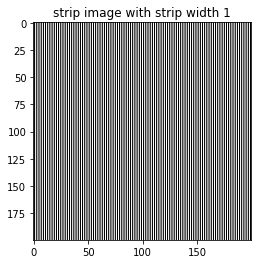

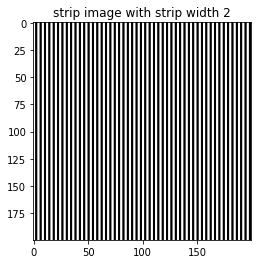

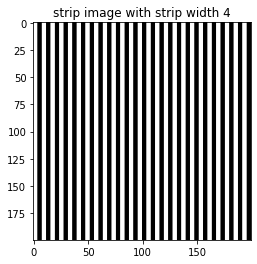

In [3]:
img1 = make_strip_img((200,200), 1)
img2 = make_strip_img((200,200), 2)
img4 = make_strip_img((200,200), 4)

In [4]:
fshift1 =  np.fft.fftshift(np.fft.fft2(img1))
magnitude_spectrum1 = np.abs(fshift1)

fshift2 =  np.fft.fftshift(np.fft.fft2(img2))
magnitude_spectrum2 = np.abs(fshift2)

fshift4 =  np.fft.fftshift(np.fft.fft2(img4))
magnitude_spectrum4 = np.abs(fshift4)


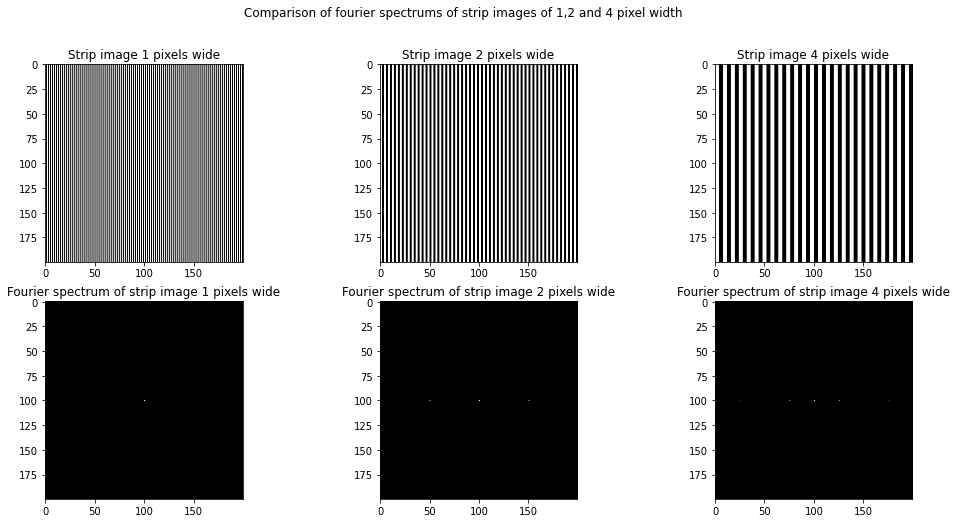

In [5]:
fig, axs = plt.subplots(2,3, figsize = (17,8))
axs[0,0].imshow(img1, cmap = 'gray')
axs[0,0].set_title("Strip image 1 pixels wide")
axs[1,0].imshow(magnitude_spectrum1, cmap = 'gray')
axs[1,0].set_title("Fourier spectrum of strip image 1 pixels wide")

axs[0,1].imshow(img2, cmap = 'gray')
axs[0,1].set_title("Strip image 2 pixels wide")
axs[1,1].imshow(magnitude_spectrum2, cmap = 'gray')
axs[1,1].set_title("Fourier spectrum of strip image 2 pixels wide")

axs[0,2].imshow(img4, cmap = 'gray')
axs[0,2].set_title("Strip image 4 pixels wide")
axs[1,2].imshow(magnitude_spectrum4, cmap = 'gray')
axs[1,2].set_title("Fourier spectrum of strip image 4 pixels wide")

plt.suptitle("Comparison of fourier spectrums of strip images of 1,2 and 4 pixel width")
plt.show()







*   b.   Components of the spectrum are only limited to the horizontal axis as the intensity of pixel values change only horizontally from one strip to another. The vertical change in frequency is zero.
*   d.Dc terms in both a) and c) are same. This is due to the fact that the central DC component is the average brightness of the image which is the same for both


.



# 2.

In [6]:
img = cv2.imread('moon.jpg', 0)

## Apply a box filter


In [7]:
def mat_mult(M1,M2):
    m,n = M1.shape
    tsum = 0
    for i in range(m):
        for j in range(n):
            tsum += M1[i,j]*M2[i,j]
    return tsum

def apply_spatial_filter(img, filter_size = [3,3]):
    if len(img.shape) == 3:
        print("Found 3 Channels : {}".format(img.shape))
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(img.shape))
    else:
        print("Image Shape : {}".format(img.shape))
    x,y = filter_size
    x = int((x-1)/2)
    y = int((y-1)/2)
    filter = np.ones(filter_size, dtype = int)
    filter = filter/(filter_size[0]*filter_size[1])
    h,w = img.shape
    img_new = np.zeros(img.shape)
    for i in range(x,h-1):
        for j in range(y,w-1):
            M1 = img[i-x:i+x+1, j-y:j+y+1]
            img_new[i, j] = mat_mult(M1,filter)
    print("OutPut Shape : {}".format(img_new.shape))
    return img_new

In [8]:
img2 = apply_spatial_filter(img)
img3 = apply_spatial_filter(img, filter_size = [5,5])
img4 = apply_spatial_filter(img, filter_size = [7,7])

Image Shape : (599, 634)
OutPut Shape : (599, 634)
Image Shape : (599, 634)
OutPut Shape : (599, 634)
Image Shape : (599, 634)
OutPut Shape : (599, 634)


## Gaussian filter

In [9]:
def gkern(l=5, sig=1.):
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

def apply_gaussian_filter(img, kernel_size = [5,5], sig = 1):
    if len(img.shape) == 3:
        print("Found 3 Channels : {}".format(img.shape))
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(img.shape))
    else:
        print("Image Shape : {}".format(img.shape))
    output = np.zeros(img.shape)
    image_row, image_col = img.shape
    kernel_row, kernel_col = kernel_size
    kernel = gkern(l = kernel_row, sig = sig)
    print("Kernel Shape : {}".format(kernel.shape))
    pad_height = int((kernel_row-1)/2)
    pad_width = int((kernel_col-1)/2)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = img
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
    output[row, col] /= kernel.shape[0] * kernel.shape[1]
    print("OutPut Shape : {}".format(output.shape))
    return output

In [10]:
img5 = apply_gaussian_filter(img, kernel_size = [3,3])

Image Shape : (599, 634)
Kernel Shape : (3, 3)
OutPut Shape : (599, 634)


## Laplacian filter

In [11]:
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
img6 = cv2.filter2D(img, -1, laplacian_kernel)

## Sobel filter

In [12]:
sobel_vertical_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_horizontal_kernel  = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img7 = cv2.filter2D(img, -1, sobel_vertical_kernel)
img8 = cv2.filter2D(img, -1, sobel_horizontal_kernel)

## PLOT

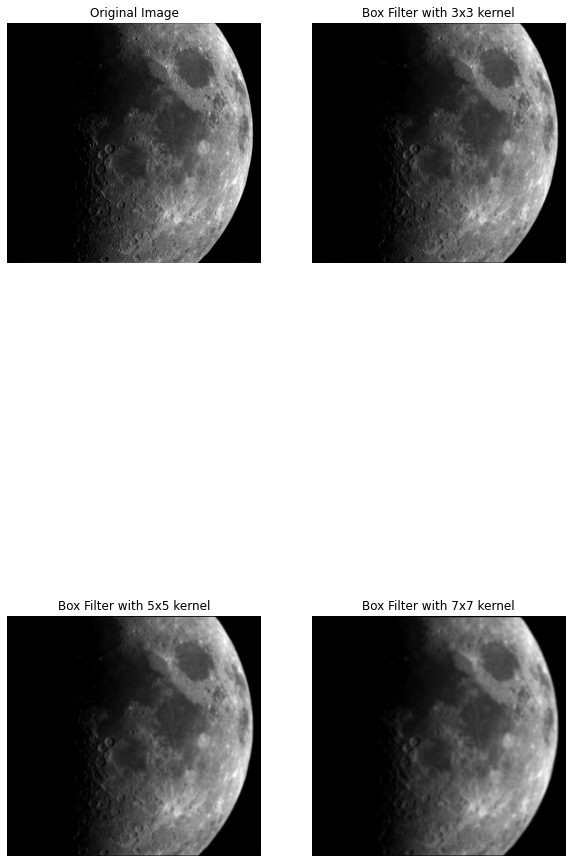

In [13]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(20)
fig.set_figwidth(10)
#fig.fig_size(10)
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(img2, cmap='gray')
axs[0, 1].set_title('Box Filter with 3x3 kernel')
axs[1, 0].imshow(img3, cmap='gray')
axs[1, 0].set_title('Box Filter with 5x5 kernel')
axs[1, 1].imshow(img4, cmap='gray')
axs[1, 1].set_title('Box Filter with 7x7 kernel')




for ax in axs.flat:
    ax.set_axis_off()
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

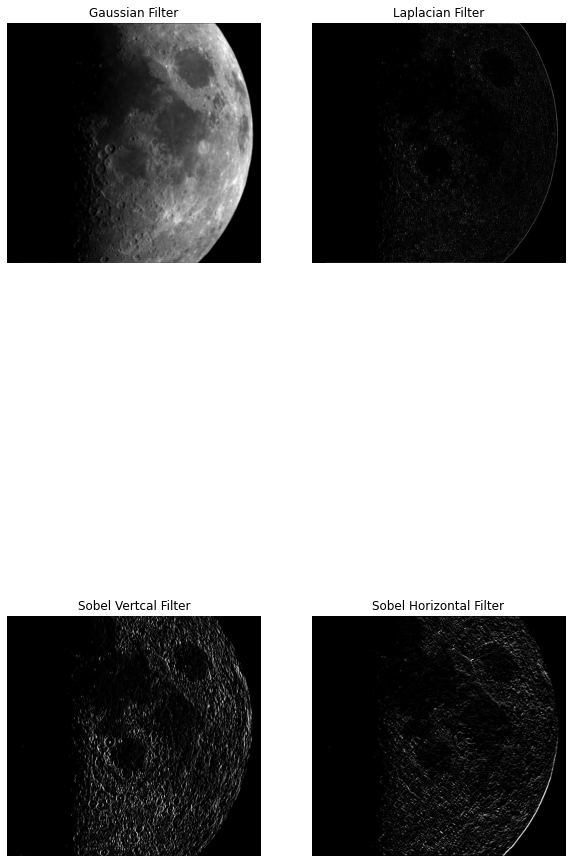

In [14]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(20)
fig.set_figwidth(10)

axs[0, 0].imshow(img5, cmap='gray')
axs[0, 0].set_title('Gaussian Filter')
axs[0, 1].imshow(img6, cmap='gray')
axs[0, 1].set_title('Laplacian Filter')
axs[1, 0].imshow(img7, cmap='gray')
axs[1, 0].set_title('Sobel Vertcal Filter')
axs[1, 1].imshow(img8, cmap='gray')
axs[1, 1].set_title('Sobel Horizontal Filter')

for ax in axs.flat:
    ax.set_axis_off()
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#3.

In [15]:
def gen_blank_img(shape, rectangle_shape):
    img_h, img_w = shape
    rectangle_height, rectangle_width = rectangle_shape
    blank = np.zeros((img_h, img_w), np.uint8)
    cx, cy = img_h//2, img_w//2
    x = int((rectangle_height-1)/2)
    y = int((rectangle_width-1)/2)
    blank[cx-x:cx+x+1, cy-y:cy+y+1] = np.ones((rectangle_height, rectangle_width), np.uint8)*255
    print("Image Shape : {}".format(blank.shape))
    print("Rectangle Shape : {}".format((rectangle_height, rectangle_width)))
    return blank

In [16]:
img = gen_blank_img((100,100), (21, 43))

Image Shape : (100, 100)
Rectangle Shape : (21, 43)


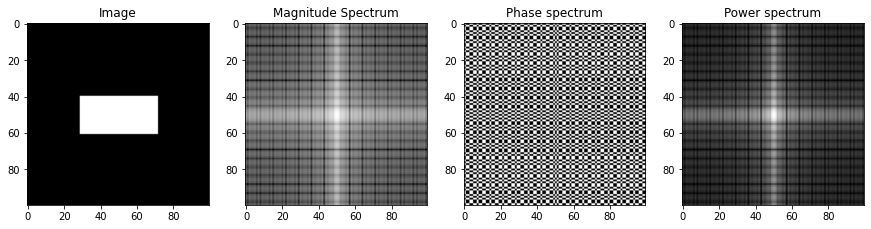

In [17]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

magnitude_spectrum = 20 * np.log(magnitude_spectrum)
power_spectrum = np.power(magnitude_spectrum,2) 

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Image")
axs[1].imshow(magnitude_spectrum, cmap = 'gray')
axs[1].set_title("Magnitude Spectrum")
axs[2].imshow(phase_spectrum, cmap = 'gray')
axs[2].set_title("Phase spectrum")
axs[3].imshow(power_spectrum, cmap = 'gray')
axs[3].set_title("Power spectrum")


plt.show()

#4. 

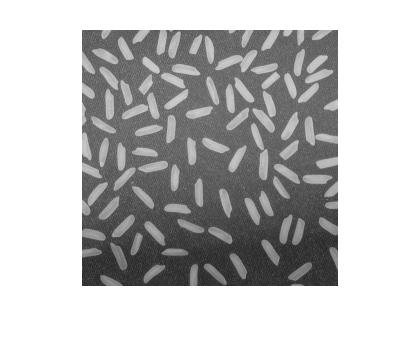

In [18]:
riceimg = cv2.imread("ricegrains.jpg", 0)
cv2_imshow(riceimg)

## a. Apply a box filter, a Gaussian filter and a median filter to smooth the image.Change the kernel size from 3x3 to 5x5 and 7x7.

Image Shape : (342, 420)
Kernel Shape : (3, 3)
OutPut Shape : (342, 420)
Image Shape : (342, 420)
Kernel Shape : (3, 3)
OutPut Shape : (342, 420)
Image Shape : (342, 420)
Kernel Shape : (3, 3)
OutPut Shape : (342, 420)


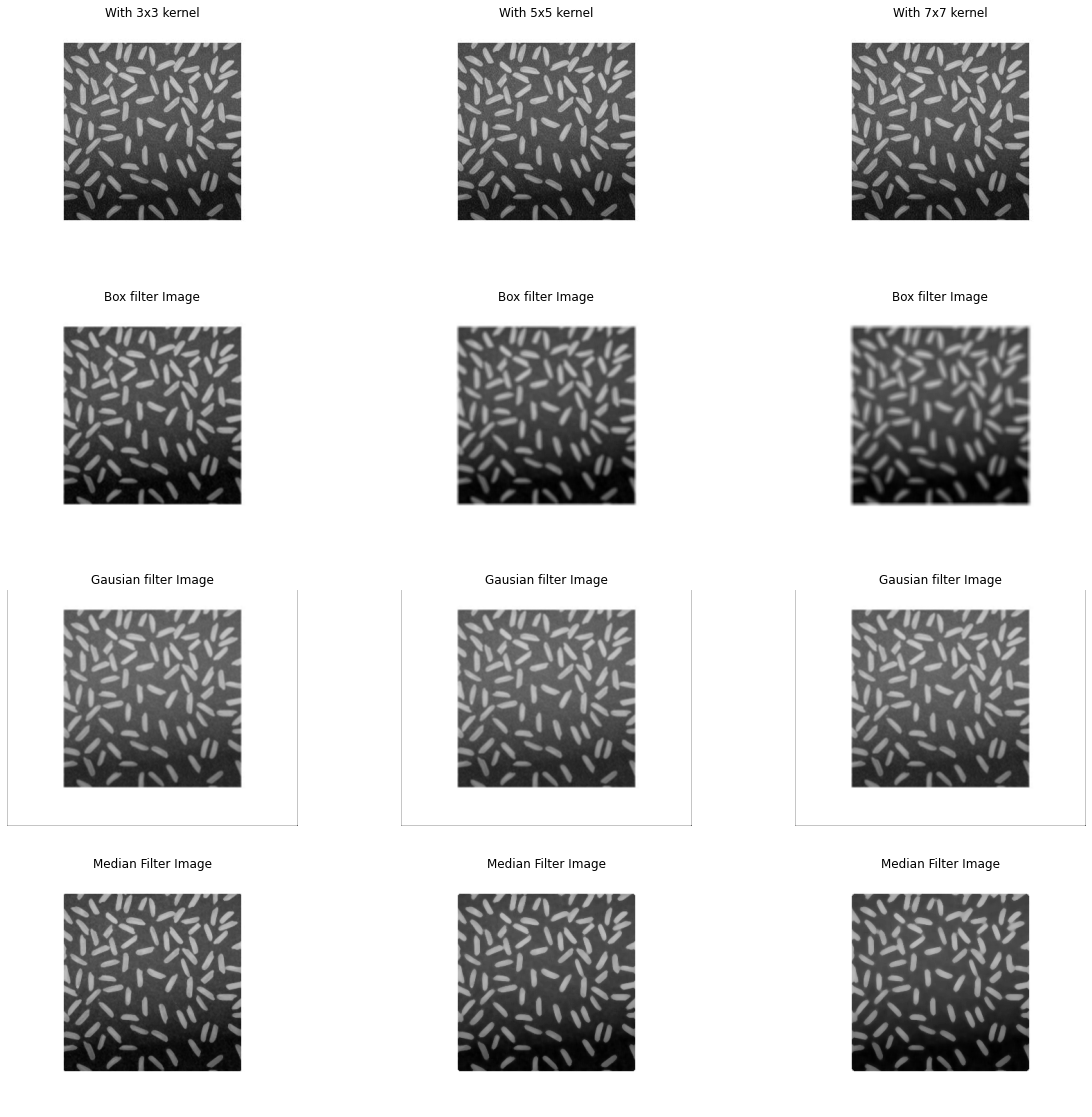

In [19]:
size = [3, 5, 7]
fig, axs = plt.subplots(4,3)
fig.set_figheight(20)
fig.set_figwidth(20)

cols = ['With 3x3 kernel', 'With 5x5 kernel', 'With 7x7 kernel']

for i in range(3):
    box = cv2.boxFilter(riceimg, -1, (size[i], size[i]))
    gaus = apply_gaussian_filter(riceimg, kernel_size = [3,3], sig = 1.5)
    median = cv2.medianBlur(riceimg, size[i])
    axs[0, i].imshow(riceimg, cmap='gray')
    axs[1, i].imshow(box, cmap='gray')
    axs[1, i].set_title('Box filter Image')
    axs[2, i].imshow(gaus, cmap='gray')
    axs[2, i].set_title('Gausian filter Image')
    axs[3, i].imshow(median, cmap='gray')
    axs[3, i].set_title('Median Filter Image') 

axs[0, 0].set_ylabel('Original Image', rotation=0, size='large')   
for ax, col in zip(axs[0], cols):
    ax.set_title(col)
for ax in axs.flat:
    ax.set_axis_off()
for ax in axs.flat:
    ax.label_outer()

## b. 



Gaussian low pass filter

In [20]:
def gauss_lpf(img, r):
    h, w = img.shape
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    output = np.zeros((h, w))
    x = h//2
    y = w//2
    H = np.zeros((h,w))

    for i in range(h):
        for j in range(w):
            d = (i-x)**2 + (j-y)**2
            H[i,j] = np.exp(-(d/(2*(r**2))))
    out_f = fshift * H
    output = np.abs(np.fft.ifft2(out_f))
    output = output.astype(np.uint8)
    print("Image Shape : {}".format(img.shape))
    print("OutPut Shape : {}".format(output.shape))
    return output

Butterworth low pass filter

In [21]:
def butterworth_lpf(img, r, n):
    h, w = img.shape
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    output = np.zeros((h, w))
    x = h//2
    y = w//2
    H = np.zeros((h,w))

    for i in range(h):
        for j in range(w):
            d = (((i-x)**2) + ((j-y)**2))**0.5
            H[i,j] = 1/(1+((d/r)**(2*n)))
    out_f = fshift * H
    output = np.abs(np.fft.ifft2(out_f))
    output = output.astype(np.uint8)
    print("Image Shape : {}".format(img.shape))
    print("OutPut Shape : {}".format(output.shape))
    return output

In [22]:
butter = butterworth_lpf(riceimg, r = 20,n=4)
gaus = gauss_lpf(riceimg, r = 20)

Image Shape : (342, 420)
OutPut Shape : (342, 420)
Image Shape : (342, 420)
OutPut Shape : (342, 420)


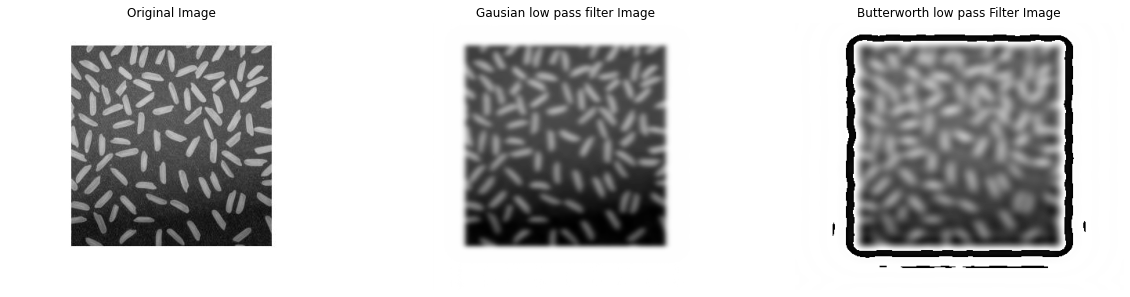

In [23]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(20)


#axs[0, 1].imshow(img, cmap='gray')
axs[0].imshow(riceimg, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(gaus, cmap='gray')
axs[1].set_title('Gausian low pass filter Image')
axs[2].imshow(butter, cmap='gray')
axs[2].set_title('Butterworth low pass Filter Image') 
  

for ax in axs.flat:
    ax.set_axis_off()
for ax in axs.flat:
    ax.label_outer()

#4.

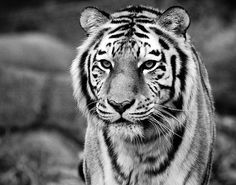

In [24]:
img = cv2.imread("tigerbw.jpg", 0)
cv2_imshow(img)

## a. 

Apply unsharp masking

In [25]:
K = 1
gker = gkern(l = 5, sig = 1)
kernel = gker * gker.T

blurred_img = cv2.filter2D(img, -1, kernel)

mask = img - blurred_img

unsharped_img = img + K*mask

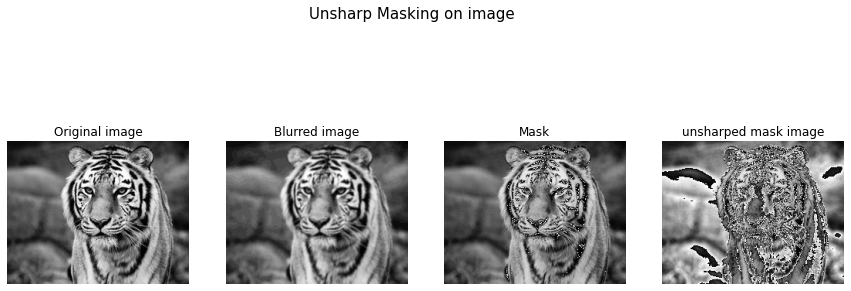

In [26]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap  ='gray')
axs[0].set_title("Original image")

axs[1].imshow(blurred_img, cmap  ='gray')
axs[1].set_title("Blurred image")

axs[2].imshow(mask, cmap  ='gray')
axs[2].set_title("Mask")

axs[3].imshow(unsharped_img, cmap  ='gray')
axs[3].set_title("unsharped mask image")

plt.suptitle("Unsharp Masking on image", fontsize = 15)

for ax in axs.flat:
    ax.set_axis_off()
for ax in axs.flat:
    ax.label_outer()

plt.show()

Sobel edge detector

In [27]:
sobel_vertical_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_horizontal_kernel  = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img_vertical = cv2.filter2D(img, -1, sobel_vertical_kernel)
img_horizontal = cv2.filter2D(img, -1, sobel_horizontal_kernel)

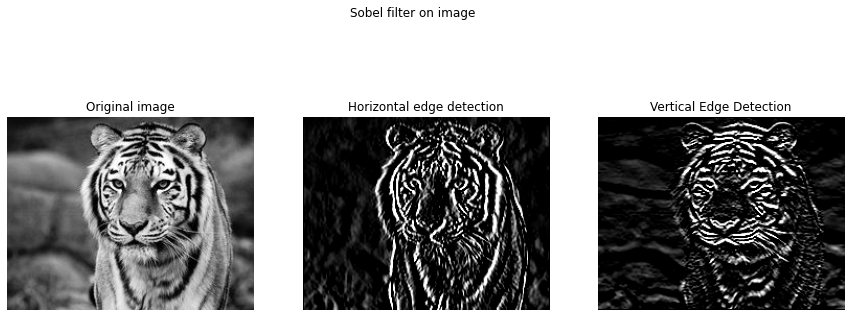

In [28]:
fig, axs = plt.subplots(1,3, figsize = (15,6))

axs[0].imshow(img, cmap  ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img_vertical, cmap  ='gray')
axs[1].set_title("Horizontal edge detection")

axs[2].imshow(img_horizontal, cmap  ='gray')
axs[2].set_title("Vertical Edge Detection")

plt.suptitle("Sobel filter on image")

for ax in axs.flat:
    ax.set_axis_off()
for ax in axs.flat:
    ax.label_outer()

plt.show()

Laplace edge detection

In [29]:
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplace_img = cv2.filter2D(img, -1, laplacian_kernel)

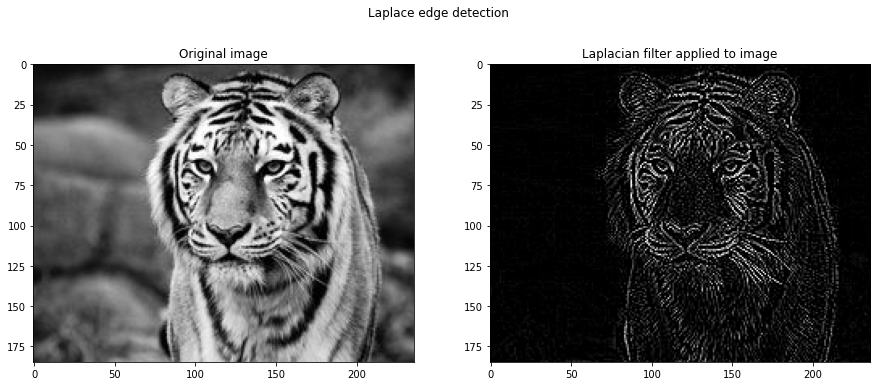

In [30]:
fig, axs = plt.subplots(1,2, figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(laplace_img, cmap = 'gray')
axs[1].set_title("Laplacian filter applied to image")

plt.suptitle("Laplace edge detection")
plt.show()

##b.

Gaussian highpass

In [31]:
def gauss_hpf(img, r):
    h, w = img.shape
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    output = np.zeros((h, w))
    x = h//2
    y = w//2
    H = np.zeros((h,w))

    for i in range(h):
        for j in range(w):
            d = (i-x)**2 + (j-y)**2
            H[i,j] = np.exp(-(d/(2*(r**2))))
    H = 1 - H
    out_f = fshift * H
    output = np.abs(np.fft.ifft2(out_f))
    output = output.astype(np.uint8)
    print("Image Shape : {}".format(img.shape))
    print("OutPut Shape : {}".format(output.shape))

    return output

Image Shape : (185, 236)
OutPut Shape : (185, 236)


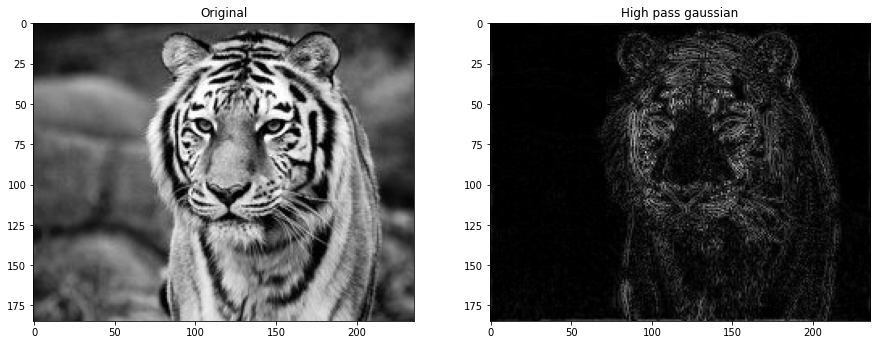

In [32]:
gauss_hpf_img = gauss_hpf(img, r = 30)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")

axs[1].imshow(gauss_hpf_img, cmap = 'gray')
axs[1].set_title("High pass gaussian")

plt.show()

Butterworth Highpass

In [33]:
def butterworth_hpf(img, r, n):
    h, w = img.shape
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    output = np.zeros((h, w))
    x = h//2
    y = w//2
    H = np.zeros((h,w))

    for i in range(h):
        for j in range(w):
            d = (((i-x)**2) + ((j-y)**2))**0.5
            H[i,j] = 1/(1+((d/r)**(2*n)))
    H = 1 - H
    out_f = fshift * H
    output = np.abs(np.fft.ifft2(out_f))
    #output = output.astype(np.uint8)
    print("Image Shape : {}".format(img.shape))
    print("OutPut Shape : {}".format(output.shape))
    return output

Image Shape : (185, 236)
OutPut Shape : (185, 236)


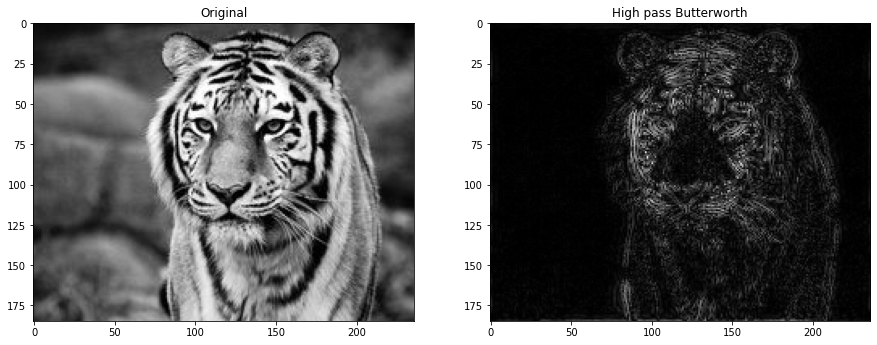

In [34]:
img = cv2.imread('tigerbw.jpg',0)
img_hp = butterworth_hpf(img, r = 30, n = 4)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")

axs[1].imshow(img_hp, cmap = 'gray')
axs[1].set_title("High pass Butterworth")

plt.show()

#6.

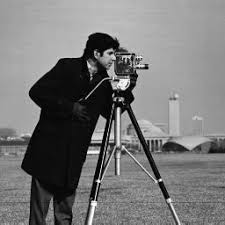

In [35]:
img = cv2.imread('cameraman.jpg',0)
cv2_imshow(img)

##a. Apply a 7 × 7 average filter in the spatial domain.

In [36]:
size = 7
box_filter = (1/(size*size))*np.ones((size,size)).astype(np.float32)

In [37]:
start_time = time.time()
filter_spatial = convolve2d(img, box_filter, 'same')
end_time = time.time()
print (filter_spatial.shape)
print ("Time taken = %f seconds" %(end_time - start_time))

(225, 225)
Time taken = 0.015929 seconds


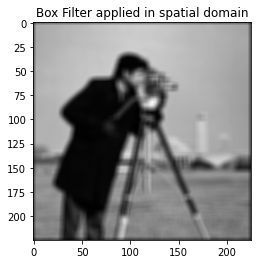

In [38]:
plt.imshow(filter_spatial, cmap = 'gray')
plt.title("Box Filter applied in spatial domain")
plt.show()

##b.

pad both the original image and the kernel

In [39]:
def padding(img, new_shape):

    h, w = img.shape
    nh, nw = new_shape
    
    if nh<h or nw<w:
        print("New shape must be bigger than previous shape")
        return
    

    padded_img = np.zeros((nh, nw))
    
    padded_img[:h, :w] = img
    
    return padded_img

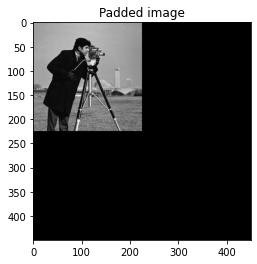

In [40]:
h, w = img.shape
nh, nw = 2*h, 2*w
padded_img = padding(img, new_shape = (nh, nw))
plt.imshow(padded_img, cmap = 'gray')
plt.title("Padded image")
plt.show()

In [41]:
box_filter.shape


(7, 7)

In [42]:
pad_filter = padding(box_filter, new_shape= (nh, nw))

transform both the padded original original image and the kernel

In [43]:
image_fft =  np.fft.fftshift(np.fft.fft2(padded_img))
kernel_fft = np.fft.fftshift(np.fft.fft2(pad_filter))




perform multiplication

In [44]:
start_time = time.time()
conv_fourier = np.multiply(image_fft, kernel_fft)
end_time = time.time()

perform inverse transform

In [45]:
transformed_spatial = np.abs(np.fft.ifft2(conv_fourier))
transformed_spatial = transformed_spatial.astype(np.uint8)

cut and display the useful content of the transformed image

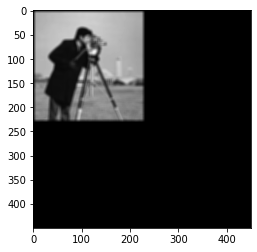

In [46]:
plt.imshow(transformed_spatial, cmap ='gray')
plt.show()

(450, 450)
(225, 225)


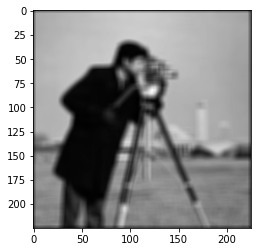

In [47]:
print (transformed_spatial.shape)
transformed_spatial_cut = transformed_spatial[3:3+h,3:3+w]
print (transformed_spatial_cut.shape)
plt.imshow(transformed_spatial_cut, cmap = 'gray')
plt.show()

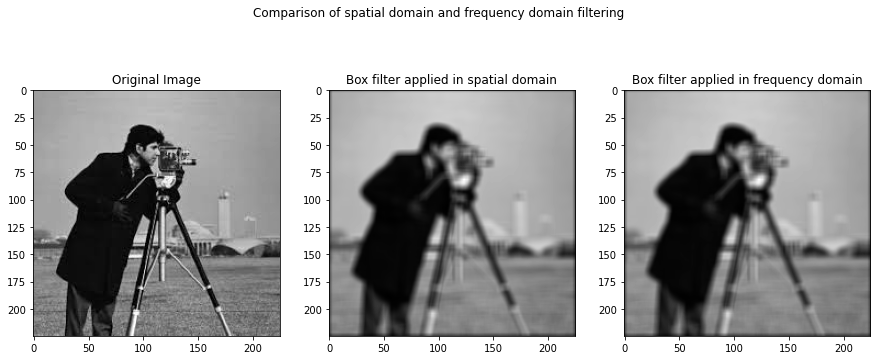

In [48]:
fig, axs = plt.subplots(1,3, figsize= (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original Image")

axs[1].imshow(filter_spatial, cmap = 'gray')
axs[1].set_title("Box filter applied in spatial domain")

axs[2].imshow(transformed_spatial_cut, cmap ='gray')
axs[2].set_title("Box filter applied in frequency domain")

plt.suptitle("Comparison of spatial domain and frequency domain filtering")
plt.show()

##c. 

In [49]:
print ("Time taken for frequency domain = %f" %(end_time - start_time))

Time taken for frequency domain = 0.001832
